In [3]:

pip install textblob

Note: you may need to restart the kernel to use updated packages.


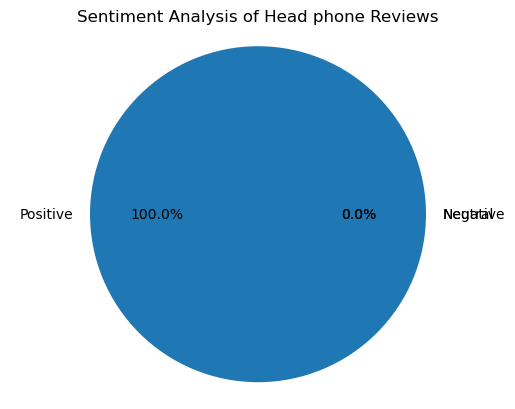

In [5]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define the function to scrape reviews
def scrape_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = []
    for review in soup.find_all('div', class_='review'):
        rating = review.find('i', class_='review-rating').text.strip()
        text = review.find('span', class_='review-text').text.strip()
        reviews.append({'rating': rating, 'text': text})
    return reviews

# Define the function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# URL of the product page on Amazon
amazon_url = 'https://www.amazon.com/Bose-QuietComfort-Wireless-Headphones-Cancelling/dp/B0756CYWWD'
# Scrape reviews
reviews = scrape_reviews(amazon_url)

if not reviews:
    print("No reviews found.")
else:
    total_sentiment_score = 0
    sentiment_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0}

    for review in reviews:
        review['sentiment'] = analyze_sentiment(review['text'])
        sentiment_counts[review['sentiment']] += 1
        total_sentiment_score += TextBlob(review['text']).sentiment.polarity

    average_sentiment_score = total_sentiment_score / len(reviews)

    labels = sentiment_counts.keys()
    sizes = sentiment_counts.values()

    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title('Sentiment Analysis of Head phone Reviews')
    plt.axis('equal')
    plt.show()
